<a href="https://colab.research.google.com/github/keplercore/X-ray-project/blob/main/X_ray_CV_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Model, Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from keras.utils.np_utils import to_categorical
import imgaug.augmenters as iaa
import cv2
import os
import glob
import gc
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Obróbka danych


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
from os.path import isfile, join
mypath = "/content/drive/MyDrive/chest_xray/train/NORMAL"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

my_path_pn = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
onlypn = [f for f in listdir(my_path_pn) if isfile(join(my_path_pn, f))]

In [ ]:
target = np.zeros((len(onlyfiles)))
df = pd.DataFrame(target)

target1 = pd.DataFrame(np.ones(len(onlypn)))

df = df.append(target1)

df = df.reset_index(drop = True)

df.info

<bound method DataFrame.info of         0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
5211  1.0
5212  1.0
5213  1.0
5214  1.0
5215  1.0

[5216 rows x 1 columns]>

In [ ]:
X = []
y = []

In [ ]:
from os import listdir
from os.path import isfile, join
mypath = "/content/drive/MyDrive/chest_xray/train/NORMAL"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#['1.jpg', '2.jpg']

In [ ]:
for image in onlyfiles:
  img = cv2.imread(mypath + "/" + image)
  img = cv2.resize(img, (150,150))
  
X.append(img)

In [ ]:
mypath = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
onlypn = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#['1.jpg', '2.jpg']

In [ ]:
for image in onlypn:
  img = cv2.imread(mypath + "/" + image)
  img = cv2.resize(img, (150,150))

  X.append(img)

Budowa zbirów


In [ ]:
y = np.array(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [ ]:
X_train, X_test = np.array(X_train), np.array(X_test)
X_train, X_test = X_train/255, X_test/255

train_y_one_hot = to_categorical(y_train) 
test_y_one_hot = to_categorical(y_test)

CNN


In [ ]:
def get_model():
  model = Sequential()
  input_shape = (150, 150, 3)
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape = input_shape))
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2,2)))

  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(2, activation='softmax'))

  opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

model = get_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, train_y_one_hot,
                   batch_size=64, epochs=10, verbose=True,
                   validation_data=(X_test, test_y_one_hot))

Epoch 1/10
66/66 [==============================] - 24s 157ms/step - loss: 0.5132 - accuracy: 0.7565 - val_loss: 0.2879 - val_accuracy: 0.9215
Epoch 2/10
66/66 [==============================] - 9s 131ms/step - loss: 0.2097 - accuracy: 0.9144 - val_loss: 0.3226 - val_accuracy: 0.8602
Epoch 3/10
66/66 [==============================] - 9s 132ms/step - loss: 0.1417 - accuracy: 0.9444 - val_loss: 0.1351 - val_accuracy: 0.9473
Epoch 4/10
66/66 [==============================] - 9s 132ms/step - loss: 0.1171 - accuracy: 0.9571 - val_loss: 0.2028 - val_accuracy: 0.9128
Epoch 5/10
66/66 [==============================] - 9s 132ms/step - loss: 0.1006 - accuracy: 0.9628 - val_loss: 0.1382 - val_accuracy: 0.9425
Epoch 6/10
66/66 [==============================] - 9s 133ms/step - loss: 0.0900 - accuracy: 0.9664 - val_loss: 0.1550 - val_accuracy: 0.9310
Epoch 7/10
66/66 [==============================] - 9s 132ms/step - loss: 0.0791 - accuracy: 0.9717 - val_loss: 0.1506 - val_accuracy: 0.9368
Epoch

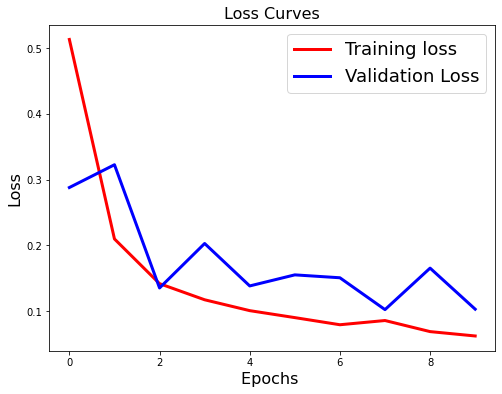

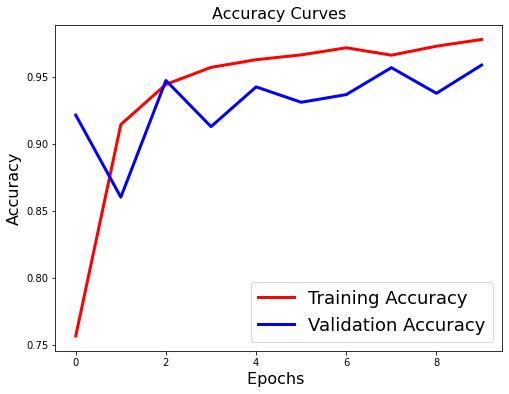

In [ ]:
def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)
 
plot_history(history)

In [ ]:
model = model.save('/content/drive/MyDrive/ColabNotebooks')
#saving model -  the only one that met the target

Efficent

In [ ]:
efficient_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(efficient_model)
model.add(GlobalAveragePooling2D ()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(.25)) 
model.add(BatchNormalization())
num_classes = 2
model.add(Dense(num_classes, activation='softmax'))

for layer in efficient_model.layers:
  if isinstance(layer, BatchNormalization):
    layer.trainable = True 
  else:
    layer.trainable = False

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
  'Generates data for Keras'
  def __init__(self, images, labels, batch_size=64, 
               shuffle=False, augment=False):
    self.labels = labels                    
    self.images = images                    
    self.batch_size = batch_size            
    self.shuffle = shuffle                  
    self.augment = augment                  
    self.on_epoch_end()

  def __len__(self):
    return int(np.floor(len(self.images) / self.batch_size))

  def on_epoch_end(self):
    self.indexes = np.arange(len(self.images))
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __getitem__(self, index):
    indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]

    labels = np.array([self.labels[k] for k in indexes])
    images = np.array([self.images[k] for k in indexes])

    if self.augment == True:
      images = self.augmentor(images)

    images=images/255
    return images, labels


  def augmentor(self, images):
    sometimes = lambda aug: iaa.Sometimes(0.5, aug)
    list_of_aumgenters = []
    list_of_aumgenters.extend([sometimes(iaa.Crop(px=(1, 16), keep_size=True)),
                              sometimes(iaa.Fliplr(0.5)),
                              sometimes(iaa.GaussianBlur(sigma=(0, 3.0)))])
    
    seq = iaa.Sequential(list_of_aumgenters)
  
  return seq.augment_images(images)

In [ ]:
generator = DataGenerator(images=X_train, labels=train_y_one_hot, batch_size=64, 
                          shuffle=True, augment=True)

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   verbose=1, patience=2)

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

history_efficnet = model.fit_generator(generator, epochs=10, verbose=True,
                              validation_data=(X_test, test_y_one_hot),
                              callbacks =[es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
65/65 [==============================] - 28s 280ms/step - loss: 0.7031 - accuracy: 0.6861 - val_loss: 0.5881 - val_accuracy: 0.7433
Epoch 2/10
65/65 [==============================] - 15s 228ms/step - loss: 0.4771 - accuracy: 0.7889 - val_loss: 0.6678 - val_accuracy: 0.7433
Epoch 3/10
65/65 [==============================] - 15s 225ms/step - loss: 0.4110 - accuracy: 0.8202 - val_loss: 0.6225 - val_accuracy: 0.7433
Epoch 3: early stopping


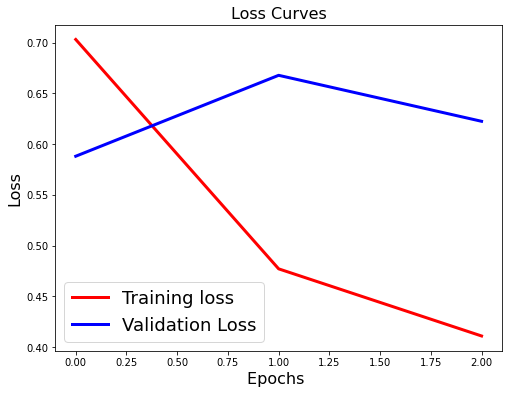

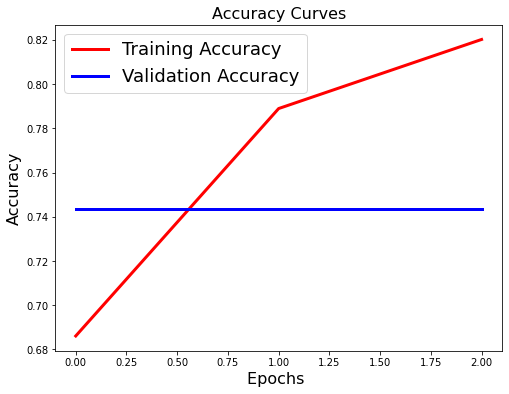

In [ ]:
plot_history(history_efficnet)

Mobilenet


In [ ]:
model = MobileNetV2(input_shape=(X_train.shape[1], X_train.shape[2], 3), classes=2, include_top=False, weights=None)
x=model.layers[-1].output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
flatten=Flatten()(x)
predictions=Dense(2, activation='softmax')(flatten)

model = Model(inputs=model.input, outputs=predictions)

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy' , metrics= ['accuracy'])

history_mobile = model.fit(X_train, train_y_one_hot, 
                    epochs=10, batch_size=64, 
                    validation_data= (X_test, test_y_one_hot), verbose=1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
66/66 [==============================] - 21s 246ms/step - loss: 0.6874 - accuracy: 0.8070 - val_loss: 1.0679 - val_accuracy: 0.2567
Epoch 2/10
66/66 [==============================] - 14s 207ms/step - loss: 0.5944 - accuracy: 0.8732 - val_loss: 0.5832 - val_accuracy: 0.7433
Epoch 3/10
66/66 [==============================] - 14s 207ms/step - loss: 0.4162 - accuracy: 0.8993 - val_loss: 0.6334 - val_accuracy: 0.7433
Epoch 4/10
66/66 [==============================] - 14s 217ms/step - loss: 0.3233 - accuracy: 0.9295 - val_loss: 0.9579 - val_accuracy: 0.7433
Epoch 5/10
66/66 [==============================] - 14s 208ms/step - loss: 0.2861 - accuracy: 0.9482 - val_loss: 0.9829 - val_accuracy: 0.7433
Epoch 6/10
66/66 [==============================] - 14s 216ms/step - loss: 0.1545 - accuracy: 0.9597 - val_loss: 1.0884 - val_accuracy: 0.7433
Epoch 7/10
66/66 [==============================] - 14s 210ms/step - loss: 0.1417 - accuracy: 0.9650 - val_loss: 0.6363 - val_accuracy: 0.7433

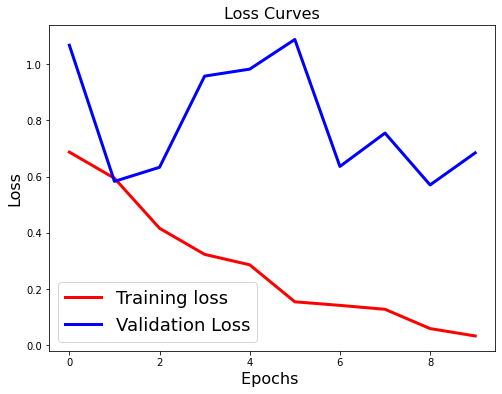

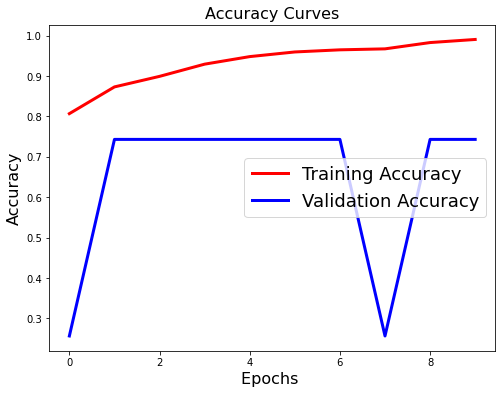

In [ ]:
plot_history(history_mobile)

In [ ]:
pip freeze > requirements.txt